In [1]:
# importiamo Pandas e il dataframe dal file data/wine.csv
import pandas as pd
df = pd.read_csv('data/wine.csv')

In [2]:
# visualizziamo il dataframe
df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
# visualizziamo il numero di vini per ogni classe
print(df.groupby('Class').size())

Class
1    59
2    71
3    48
dtype: int64


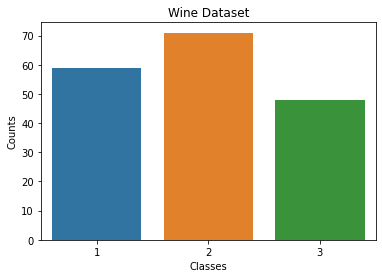

In [4]:
# per maggior chiarezza, visualizziamo anche il grafico delle classi dei vini
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


sns.countplot(x="Class", data=df)
plt.title("Wine Dataset")
plt.xlabel("Classes")
plt.ylabel("Counts")
plt.show()

In [5]:
# traformiamo il dataframe in una matrice numpy e separiamo il target (la classe, prima colonna, che chiamiamo y)
# dal resto dei dati (le osservazioni, che chiameremo x)

import numpy as np
dfnp = df.to_numpy()
x=dfnp[:,1:] # i primi : servono per prendere tutte le righe(prendo tutti gli array dentro l'array) e i secondi : per prendere le colonne
y=dfnp[:,0] # prendiamo solo l'ultima colonna -> variabile dipendente, target



In [6]:
# vediamo i dati presenti in x e y
print(x[:10])
print(f'y = {y[:10]}')

[[1.423e+01 1.710e+00 2.430e+00 1.560e+01 1.270e+02 2.800e+00 3.060e+00
  2.800e-01 2.290e+00 5.640e+00 1.040e+00 3.920e+00 1.065e+03]
 [1.320e+01 1.780e+00 2.140e+00 1.120e+01 1.000e+02 2.650e+00 2.760e+00
  2.600e-01 1.280e+00 4.380e+00 1.050e+00 3.400e+00 1.050e+03]
 [1.316e+01 2.360e+00 2.670e+00 1.860e+01 1.010e+02 2.800e+00 3.240e+00
  3.000e-01 2.810e+00 5.680e+00 1.030e+00 3.170e+00 1.185e+03]
 [1.437e+01 1.950e+00 2.500e+00 1.680e+01 1.130e+02 3.850e+00 3.490e+00
  2.400e-01 2.180e+00 7.800e+00 8.600e-01 3.450e+00 1.480e+03]
 [1.324e+01 2.590e+00 2.870e+00 2.100e+01 1.180e+02 2.800e+00 2.690e+00
  3.900e-01 1.820e+00 4.320e+00 1.040e+00 2.930e+00 7.350e+02]
 [1.420e+01 1.760e+00 2.450e+00 1.520e+01 1.120e+02 3.270e+00 3.390e+00
  3.400e-01 1.970e+00 6.750e+00 1.050e+00 2.850e+00 1.450e+03]
 [1.439e+01 1.870e+00 2.450e+00 1.460e+01 9.600e+01 2.500e+00 2.520e+00
  3.000e-01 1.980e+00 5.250e+00 1.020e+00 3.580e+00 1.290e+03]
 [1.406e+01 2.150e+00 2.610e+00 1.760e+01 1.210e+02 2.6

In [7]:
# ora contiamo le classi che sono presenti nella y per vedere se corrispondono a quanto trovato nel dataframe
#Print class frequencies through collections counter
import collections
collections.Counter(y)

Counter({1.0: 59, 2.0: 71, 3.0: 48})

In [8]:
#suddividiamo ora i dati in due dataset, uno per 'allenare' il metodo (training set) 
# e l'altro per testarne l'efficacia (test set). Facciamo in modo che il training set sia il 70% del totale

from sklearn.model_selection import train_test_split # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y, 
                                                    test_size = 0.30, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability

In [9]:
# visualizziamo gli shape dei vari dataset X_train, X_test, y_train e y_test
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((124, 13), (124,), (54, 13), (54,))

In [10]:
# visualizziamo anche le prime 10 righe dell'X_train e dell'y_train per vedere i dati
# eliminiamo la dotazine scientifica per comodità di lettura

# suppress scientific notation
np.set_printoptions(suppress=True)
print(X_train[:10])
print(f'y = {y_train[:10]}')

[[  13.2     1.78    2.14   11.2   100.      2.65    2.76    0.26    1.28
     4.38    1.05    3.4  1050.  ]
 [  14.02    1.68    2.21   16.     96.      2.65    2.33    0.26    1.98
     4.7     1.04    3.59 1035.  ]
 [  13.23    3.3     2.28   18.5    98.      1.8     0.83    0.61    1.87
    10.52    0.56    1.51  675.  ]
 [  12.37    1.63    2.3    24.5    88.      2.22    2.45    0.4     1.9
     2.12    0.89    2.78  342.  ]
 [  14.12    1.48    2.32   16.8    95.      2.2     2.43    0.26    1.57
     5.      1.17    2.82 1280.  ]
 [  12.21    1.19    1.75   16.8   151.      1.85    1.28    0.14    2.5
     2.85    1.28    3.07  718.  ]
 [  12.96    3.45    2.35   18.5   106.      1.39    0.7     0.4     0.94
     5.28    0.68    1.75  675.  ]
 [  13.69    3.26    2.54   20.    107.      1.83    0.56    0.5     0.8
     5.88    0.96    1.82  680.  ]
 [  14.23    1.71    2.43   15.6   127.      2.8     3.06    0.28    2.29
     5.64    1.04    3.92 1065.  ]
 [  12.29    3.17    2

In [11]:
# importiamo il metodo di classificazione K-NN
from sklearn.neighbors import KNeighborsClassifier

In [66]:
# inizializziamo il metodo con n_neighbors=8
neigh = KNeighborsClassifier(n_neighbors=8)

In [67]:
# "alleniamo" il metodo con i dati del training set
# prima parte: dobbiamo fare in modo che il metodo impari dalle informazioni a disposizione
# NB: notare che il metodo utilizza sia X_train che y_train, perché deve capire se sta predicendo correttamente
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

KNeighborsClassifier(n_neighbors=9)

In [68]:
# proviamo a fare una previsione sui dati del test set
# seconda parte: vediamo se il metodo ha imparato bene facendogli prevedere i risultati 
# NB: notare che c'è solo X perché le y devono essere previste dal metodo
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

In [62]:
# e visualizziamo il risultato (solo i primi dieci vini)
# visualizziamo il risultato (solo i primi dieci pazienti)
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [3. 1. 1. 2. 1. 1. 1. 2. 2. 3.]
dati reali presenti nel dataset di test = [1. 1. 1. 2. 1. 1. 1. 2. 3. 2.]


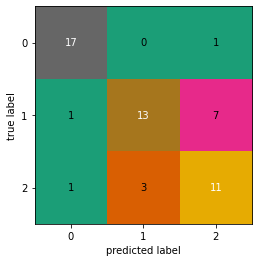

In [48]:
# valutiamo il nostro metodo:
# visualizziamo la confusion matrix
#plots IMPORTS
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show() 

In [63]:
# perché questa volta la matrice è una matrice 3x3?
# risposta:

#Perchè abbiamo tre classsi di vini

In [64]:
# prendendo in considerazione i vini di classe 3, quanto valgono TP, FP, FN e TN?
# TP = quando la revisione dice una classe ed effittivamente quel vino appartiene a quella classe.
# FP = quando la previsione dice che quel vino appartiene ad una classe ma in realtà no.
# FN =
# TN = 

In [69]:
# visualizziamo adesso gli indicatori
print(classification_report(y_test, predict))


              precision    recall  f1-score   support

         1.0       0.89      0.94      0.92        18
         2.0       0.81      0.62      0.70        21
         3.0       0.58      0.73      0.65        15

    accuracy                           0.76        54
   macro avg       0.76      0.77      0.76        54
weighted avg       0.78      0.76      0.76        54



In [20]:
# sulla base degli indicatori, che cosa possiamo dire del nostro metodo? Motivare la risposta
# risposta: Che il nostro metodo è accurato al 75%.


In [21]:
# proviamo a determinare adesso la classe del vino di cui abbiamo avuto le caratteristiche all'inizio dell'esercizio

from tabulate import tabulate

info = ['Alcohol', 'MA', 'Ash', 'AA', 'Magnesium', 'TP', 'Flavanoids', 'NF', 'PAc', 'CI', 'Hue', 'OD280/OD315', 'Proline']
daScoprire = [12.37, 1.07, 2.1, 18.5, 88, 3.52, 3.75, .24, 1.95, 4.5, 1.04, 2.77, 660] 
print(tabulate([daScoprire], headers=info))

  Alcohol    MA    Ash    AA    Magnesium    TP    Flavanoids    NF    PAc    CI    Hue    OD280/OD315    Proline
---------  ----  -----  ----  -----------  ----  ------------  ----  -----  ----  -----  -------------  ---------
    12.37  1.07    2.1  18.5           88  3.52          3.75  0.24   1.95   4.5   1.04           2.77        660


In [22]:
daScoprire = [[12.37, 1.07, 2.1, 18.5, 88, 3.52, 3.75, .24, 1.95, 4.5, 1.04, 2.77, 660]]
predictDaScoprire = neigh.predict(daScoprire)
predictDaScoprire 

array([3.])

In [23]:
# a quale classe appartiene questo vino (= come viene classificato questo vino dal metodo)?
# risposta: 3

In [24]:
# il vino che abbiamo testato in realtà è uno di quelli già presenti nel dataset. 
# Provate ad andare a vedere nel dataframe Pandas se la predizione del metodo è corretta o meno
# cercando alcune caratteristiche del nostro vino, ad esempio 'Alcohol' = 12.37, 'Ash' = 2.10 e 'Magnesium' = 88

df[(df['Alcohol'] == 12.37) & (df['Ash'] == 2.10) & (df['Magnesium'] == 88)]

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315,Proline
98,2,12.37,1.07,2.1,18.5,88,3.52,3.75,0.24,1.95,4.5,1.04,2.77,660


In [25]:
# a quale classe appartiene questo vino?
# risposta: 2